## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[ 21,  38,  70],
       [ 48,  56,  79],
       [ 17,  66,  68],
       [ 77,  83,  89],
       [ 31,  37, 100],
       [ 80,  86,  87]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([21, 38, 70]), array([48, 56, 79]))

The lowest card in the game is

In [5]:
np.min(cards)

17

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

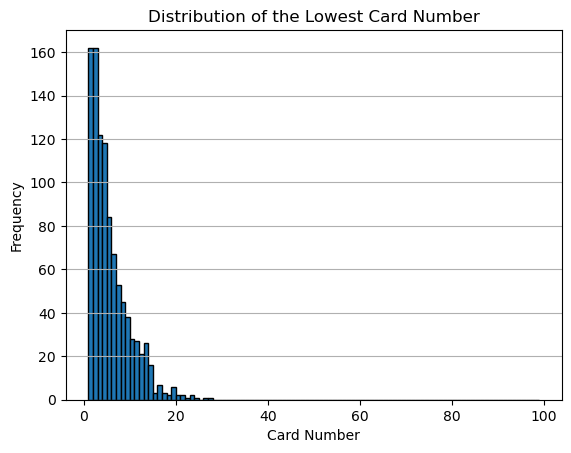

In [7]:
def find_lowest_distribution(N, n, k, num_samples):
    """
    Finds the distribution of the lowest card number over multiple samples.
    
    Arguments:
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - num_samples : Number of times to sample the game (default is 1000)
        
    Returns:
        - A list of the lowest card from each sample
    """
    lowest_cards = []
    
    for _ in range(num_samples):
        cards = sample_cards(N, n, k)
        lowest_card = np.min(cards)
        lowest_cards.append(lowest_card)
    
    return lowest_cards

# Parameters
N = 100
n = 6
k = 3
num_samples = 1000

# Find the distribution of the lowest card
lowest_cards_distribution = find_lowest_distribution(N, n, k, num_samples)

# Plot the distribution
plt.hist(lowest_cards_distribution, bins=np.arange(1, N), edgecolor='black')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.title('Distribution of the Lowest Card Number')
plt.grid(axis='y')
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

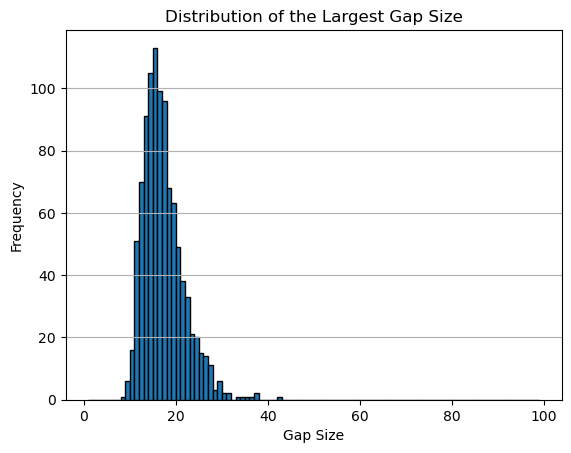

In [8]:
def find_largest_gap_distribution(N, n, k, num_samples):
    """
    Finds the distribution of the largest gap between consecutive cards over multiple samples.
    
    Arguments:
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - num_samples : Number of times to sample the game (default is 1000)
        
    Returns:
        - A list of the largest gap from each sample
    """
    largest_gaps = []
    
    for _ in range(num_samples):
        cards = sample_cards(N, n, k)
        flat_cards = cards.flatten()# transforms the array into a 1 dim array
        sorted_flat_cards = np.sort(flat_cards)
        gaps = np.diff(sorted_flat_cards)
        largest_gap = np.max(gaps)
        largest_gaps.append(largest_gap)
    
    return largest_gaps

# Parameters
N = 100
n = 6
k = 3
num_samples = 1000

# Find the distribution of the largest gap
largest_gap_distribution = find_largest_gap_distribution(N, n, k, num_samples)

# Plot the distribution
plt.hist(largest_gap_distribution, bins=np.arange(1, N), edgecolor='black')
plt.xlabel('Gap Size')
plt.ylabel('Frequency')
plt.title('Distribution of the Largest Gap Size')
plt.grid(axis='y')
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

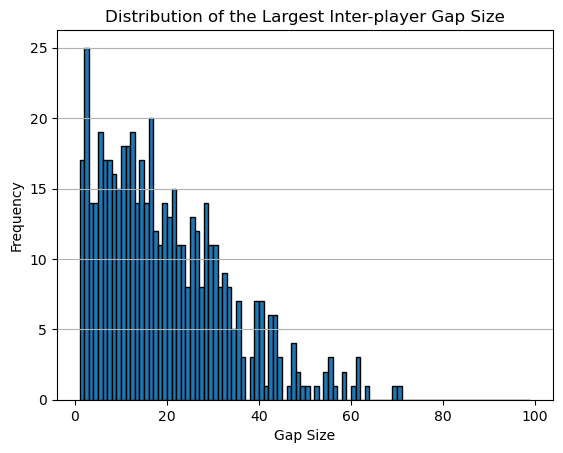

In [9]:
def find_largest_interplayer_gap_distribution(N, n, k, num_samples):
    """
    Finds the distribution of the largest gap between cards held by different players over multiple samples.
    
    Arguments:
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - num_samples : Number of times to sample the game (default is 1000)
        
    Returns:
        - A list of the largest gap from each sample
    """
    largest_gaps = []
    
    for _ in range(num_samples):
        cards = sample_cards(N, n, k)
        max_gap = 0
        
        for i in range(n):
            for j in range(i+1, n):
                gap1 = cards[j, 0] - cards[i, -1] - 1
                gap2 = cards[i, 0] - cards[j, -1] - 1
                max_gap = max(max_gap, gap1, gap2)
        
        largest_gaps.append(max_gap)
    
    return largest_gaps

# Parameters
N = 100
n = 6
k = 3
num_samples = 1000

# Find the distribution of the largest gap
largest_interplayer_gap_distribution = find_largest_interplayer_gap_distribution(N, n, k, num_samples)

# Plot the distribution
plt.hist(largest_interplayer_gap_distribution, bins=np.arange(1, N), edgecolor='black')
plt.xlabel('Gap Size')
plt.ylabel('Frequency')
plt.title('Distribution of the Largest Inter-player Gap Size')
plt.grid(axis='y')
plt.show()


How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

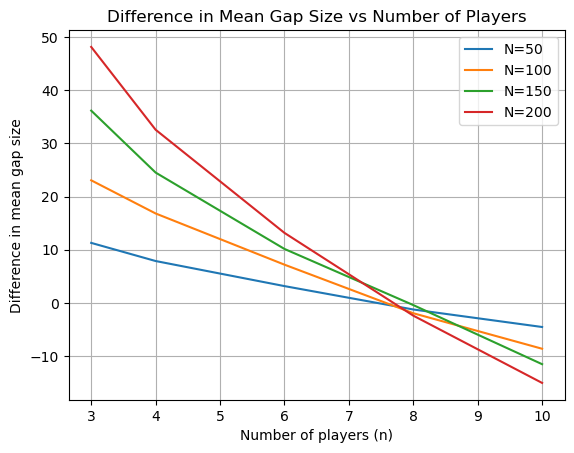

In [10]:
# Defining the ranges for N and n
N_values = [50, 100, 150, 200]
n_values = [3, 4, 6, 8, 10]
k = 3
num_samples = 1000

# Initializing a list to store the results
results = []

# Looping over all combinations of N and n
for N in N_values:
    for n in n_values:
        # Getting the distributions for the current values of N and n
        largest_gap_distribution = find_largest_gap_distribution(N, n, k, num_samples)
        largest_interplayer_gap_distribution = find_largest_interplayer_gap_distribution(N, n, k, num_samples)
        
        # Computing the means of the distributions
        mean_largest_gap = np.mean(largest_gap_distribution)
        mean_largest_interplayer_gap = np.mean(largest_interplayer_gap_distribution)
        
        # Computing the difference between the means
        mean_difference = mean_largest_gap - mean_largest_interplayer_gap
        
        # Appending the results to the list
        results.append((N, n, mean_largest_gap, mean_largest_interplayer_gap, mean_difference))

# Converting the results to a numpy array for easier analysis
results = np.array(results)

# Analyzing the results
for N in N_values:
    # Getting the results for the current value of N
    N_results = results[results[:,0] == N]
    
    # Plotting the mean difference as a function of n
    plt.plot(N_results[:,1], N_results[:,4], label=f'N={N}')

# Adding labels and a legend to the plot
plt.xlabel('Number of players (n)')
plt.ylabel('Difference in mean gap size')
plt.title('Difference in Mean Gap Size vs Number of Players')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# With more cards the mean gap size goes up as expected but it decreases with the number of players. 
# It goes to 0 for 7-8 players. 

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

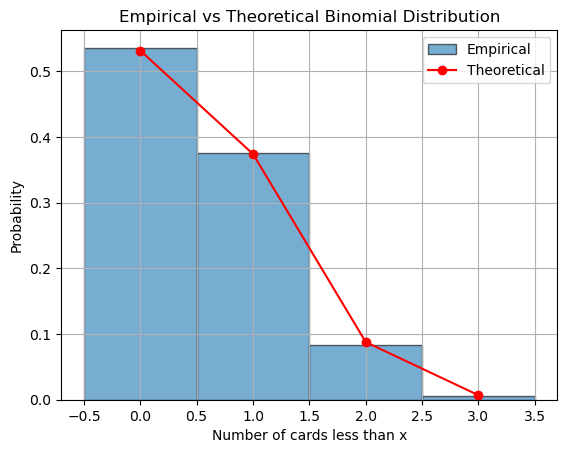

In [12]:
from scipy.stats import binom

# To derive a binomial distribution, we look a specific card number, x
# Now we want to find the distribution of the number of players that have cards less than x in their hand. 
# Since each card is equally likely to be in any player's hand, 
# the number of cards less than x in a player's hand follows a binomial distribution.

# Define parameters
N = 100
n = 6
k = 3
x = 20
num_samples = 1000

# Step 2: Run single game simulations and get empirical distribution
empirical_data = []
for _ in range(num_samples):
    cards = sample_cards(N, n, k)
    for player in cards:
        less_than_x = np.sum(player < x)
        empirical_data.append(less_than_x)

# Step 3: Theoretical binomial distribution
p = (x - 1) / N
rv = binom(k, p)

# Step 4: Comparison
x_values = np.arange(0, k+1)
theoretical_values = rv.pmf(x_values)

# Step 5: Visualization
plt.hist(empirical_data, bins=np.arange(0, k+2) - 0.5, density=True, label='Empirical', alpha=0.6, edgecolor='black')
plt.plot(x_values, theoretical_values, marker='o', label='Theoretical', color='red')
plt.xlabel('Number of cards less than x')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical Binomial Distribution')
plt.legend()
plt.grid(True)
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

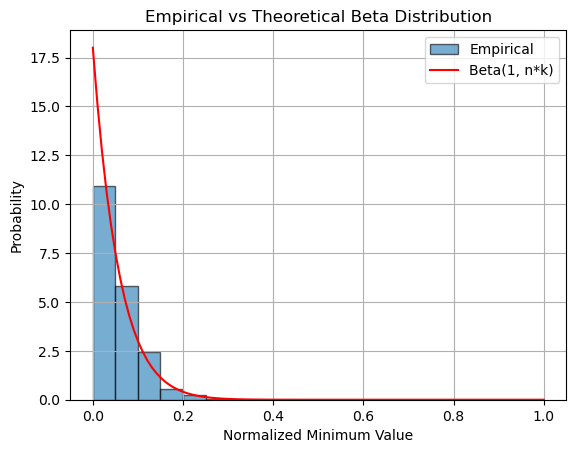

In [13]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

# To compare the distribution of the lowest number in the sample with a Beta distribution, 
# we first need to normalize our sampled data (as our data are integers between 1 and N) to fit into a 0-1 scale 
# Then we can compare the distribution of the minimum value with a Beta distribution. 
# The kth order statistic being distributed as Beta(k, n+1-k) means that the minimum value (1st order statistic) 
# will follow a Beta(1, n+1-1) = Beta(1, n) distribution.

# Define parameters
N = 100
n = 6
k = 3
num_samples = 1000

# Step 2: Sampling and Finding the Minimum
min_values = []
for _ in range(num_samples):
    cards = sample_cards(N, n, k)
    min_value = np.min(cards) / N  # Normalizing to [1/N, 1]
    min_values.append(min_value)

# The theoretical Beta distribution for the minimum value in this case would be Beta(1, n), 
# where n is the number of cards sampled in each simulation (which is n * k, 
# the total number of cards distributed to all players).      
    
# Step 3: Beta Distribution
x = np.linspace(0, 1, 100)
y = beta.pdf(x, 1, n*k)

# Step 4 and 5: Comparison and Visualization
plt.hist(min_values, bins=np.linspace(0, 1, 21), density=True, alpha=0.6, label='Empirical', edgecolor='black')
plt.plot(x, y, label='Beta(1, n*k)', color='red')
plt.xlabel('Normalized Minimum Value')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical Beta Distribution')
plt.legend()
plt.grid(True)
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

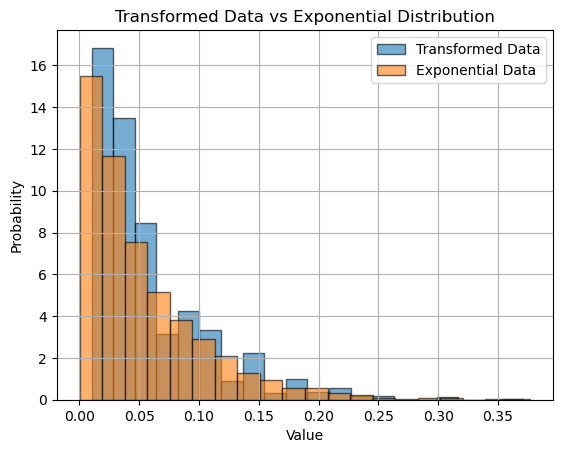

In [14]:

# Define parameters
N = 100
n = 6
k = 3
num_samples = 1000

# Step 1: Generate Data and Step 2: Transform Data
transformed_data = []
for _ in range(num_samples):
    cards = sample_cards(N, n, k)
    min_value = np.min(cards)
    transformed_value = -np.log(1 - min_value/N)
    transformed_data.append(transformed_value)

# Step 3: Generate Exponential Data
scale = 1/(n*k)
exponential_data = np.random.exponential(scale, num_samples)

# Step 4: Visual Comparison
plt.hist(transformed_data, bins=20, density=True, alpha=0.6, label='Transformed Data', edgecolor='black')
plt.hist(exponential_data, bins=20, density=True, alpha=0.6, label='Exponential Data', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Transformed Data vs Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [15]:
# When n⋅k≪N, the game transitions to a situation where the number of cards sampled is much smaller 
# compared to the total pool of available cards. 
# This makes the sampling process almost like sampling with replacement, 
# because the probability of picking any particular card remains almost constant across draws.

# 1. Distribution of the Lowest Number

    # With Replacement: Every sample is drawn from a population of N cards. 
    # The distribution of the lowest number should be close to uniform 
    # because every card has an equal chance of being the minimum.

    # Without Replacement: Since we are sampling only a tiny fraction of the total pool, 
    # the distribution of the lowest number might still resemble the uniform distribution. 
    # However, it might start showing a slight skew because the probability of drawing a 
    # very small card increases as more cards are drawn.

# 2. Distribution of the Largest Gap
 
    # With Replacement: The largest gap can be quite large because it's possible (although unlikely) to draw 
    # the same card multiple times.

    # Without Replacement: Since only a small fraction of the total pool is being sampled, 
    # the largest gap can potentially be quite large as well, but it won't be as large as 
    # in the case of sampling with replacement. The gaps might be relatively more uniform.

# 3. Binomial Distribution

    # With Replacement: It would closely follow a binomial distribution since each draw is independent 
    # and has the same probability of success.

    # Without Replacement: It may still resemble a binomial distribution but with some deviations 
    # since the draws are not perfectly independent.

# 4. Beta and Exponential Distributions
    
    # With Replacement: The distributions might not closely follow the beta or exponential distributions, 
    # as these distributions are derived under the assumption of sampling without replacement.

    # Without Replacement: The beta and exponential distributions would still be applicable, 
    # but the parameters might need to be adjusted to account for the much larger pool size.

# 5. Overall Similarities and Differences
    
    # Similarities: When n⋅k≪N, sampling with and without replacement will yield similar distributions, 
    # especially for the lower order statistics (like the minimum value).

    # Differences: The differences will become more pronounced for higher order statistics (like the largest gap), 
    # where sampling without replacement can prevent the possibility of having extremely large gaps that are 
    # possible with replacement.


Without replacement: [[  8  60 147]
 [ 54 155 193]
 [ 13  69 167]
 [ 26 150 178]]
With replacement: [[ 23  62 104]
 [ 87 132 176]
 [135 156 157]
 [140 172 173]]


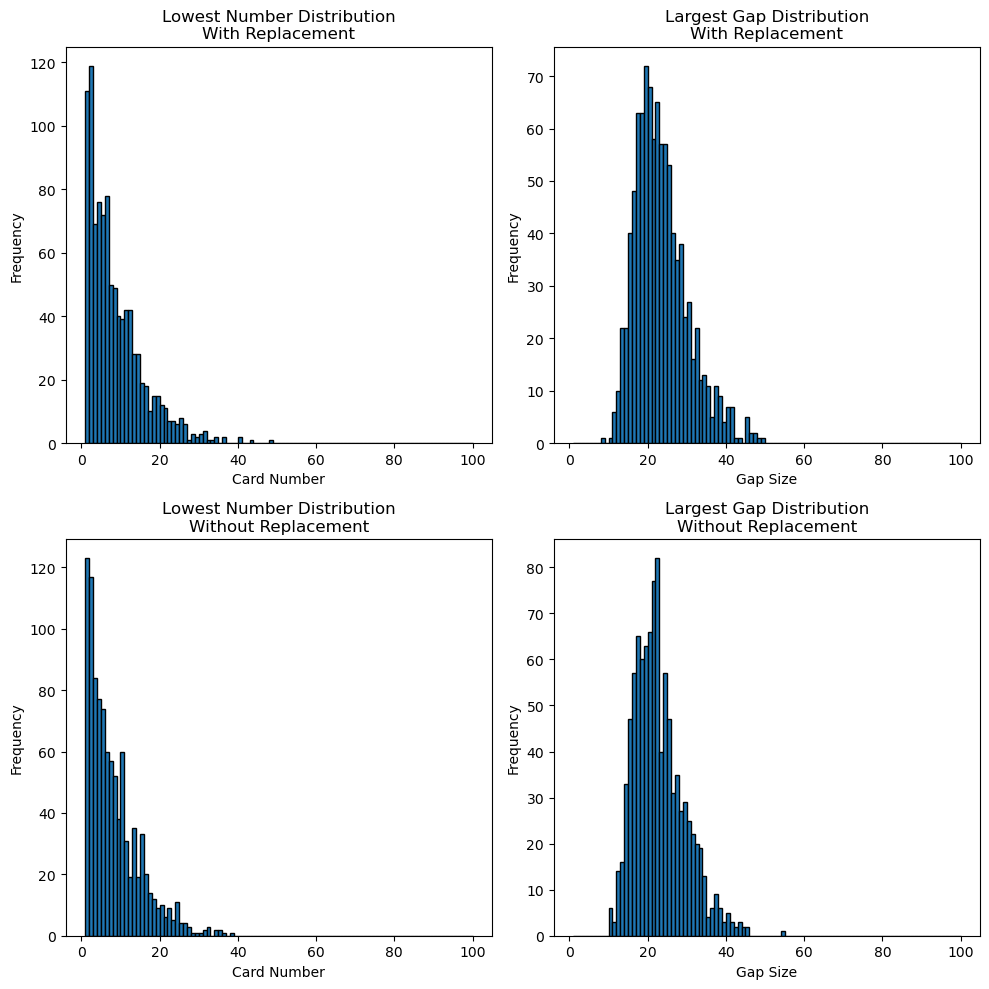

In [20]:
def sample_cards(N, n, k, replacement=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - replacement : Boolean indicating whether sampling is with replacement or not
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    if not replacement:
        assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

# Without replacement
cards_without_replacement = sample_cards(N, n, k, replacement=False)
print("Without replacement:", cards_without_replacement)

# With replacement
cards_with_replacement = sample_cards(N, n, k, replacement=True)
print("With replacement:", cards_with_replacement)


def find_largest_gap(cards):
    all_cards = cards.flatten()
    all_cards.sort()
    gaps = np.diff(all_cards)
    return np.max(gaps)

# Parameters
N = 100
n = 4
k = 3
num_samples = 1000

# Prepare data storage
lowest_numbers = {'with_replacement': [], 'without_replacement': []}
largest_gaps = {'with_replacement': [], 'without_replacement': []}

# Simulate samples
for replacement, label in [(True, 'with_replacement'), (False, 'without_replacement')]:
    for _ in range(num_samples):
        cards = sample_cards(N, n, k, replacement=replacement)
        lowest_number = np.min(cards)
        largest_gap = find_largest_gap(cards)
        
        lowest_numbers[label].append(lowest_number)
        largest_gaps[label].append(largest_gap)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot histograms
for i, (label, title) in enumerate([( 'with_replacement', 'With Replacement'), ('without_replacement', 'Without Replacement')]):
    axes[i, 0].hist(lowest_numbers[label], bins=np.arange(1, N+1), edgecolor='black')
    axes[i, 0].set_title(f'Lowest Number Distribution\n{title}')
    axes[i, 0].set_xlabel('Card Number')
    axes[i, 0].set_ylabel('Frequency')
    
    axes[i, 1].hist(largest_gaps[label], bins=np.arange(1, N+1), edgecolor='black')
    axes[i, 1].set_title(f'Largest Gap Distribution\n{title}')
    axes[i, 1].set_xlabel('Gap Size')
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3:

In [17]:
# Hannah Neumann (Repository: hannahneumannBerkeley, hannah_neummann (1875679))

SyntaxError: invalid syntax (574449989.py, line 1)